<a href="https://colab.research.google.com/github/luisantoniourbanaviles/Simulacion-II/blob/main/Primer%20parcial/Primer%20examen/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

 Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].\\

 Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10.




### Solucion por simulación

**Paso 1.**

Tenemos dos variables: $X_1$ y $X_2$

Que representan el tiempo en el que llegan a la cita entre 0 y 30 min

**Paso 2 y 3.**

Sean $X_1$ y $X_2$ variables aleatorias continuas con distribucion uniforme 
\begin{align*}
  X_1 &\sim U(0,30)\\
  X_2 &\sim U(0,30)
\end{align*}

**Paso 4**

Tenemos que la expresion para que cualquier persona espere a la otra como maximo 10 min es

\begin{equation*}
  |X_1-X_2|\leq10
\end{equation*}

In [108]:
# Librerias a usar 

import numpy as np
import math as mt
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as sst


Implementando el codigo de la ecuacion objetivo

In [41]:
# espera: Funcion que devuelve el valor 1, si es que una de las dos personas espera 10 min o
#         0 si no espero una persona 
def espera():
  espera_10 = 0;
  X_1 = rd.uniform(0,30) # La funcion uniform genera un valor aleatorio
  X_2 = rd.uniform(0,30) # 

  if abs(X_1 - X_2)<= 10:
    espera_10 = 1
  return(espera_10)

In [46]:
espera()

0

**Paso 5.** Diseño del experimento

Para estimar la probabilidad del suceso, en N "citas", nesecitamos el numero n de las veces que uno espero al otro 10 min

In [90]:
# prob_10: Funcion que estima la probablidad de que en N "citas"
# una persona espere a la otra como maximo 10 min
# Devuelve una lista con las probablidad del suceso en N "citas"
def prob_10(N):
  citas = []        #Lista que guarda si una persona espero o no a la otra
  prob_espera = []  #Lista que guarda la probablidad del suceso en N citas

  for x in range(N):
    citas.append(espera())
    prob_espera.append( np.mean(citas) )
  return(prob_espera)

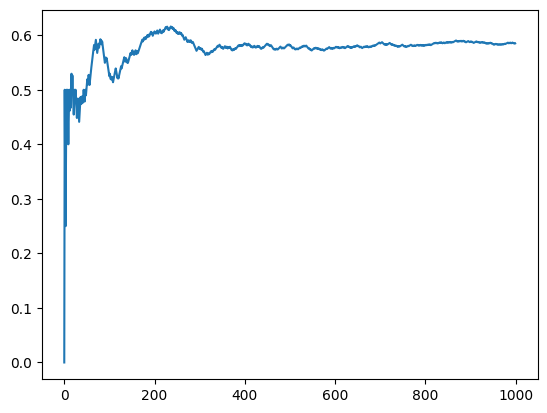

In [101]:
p = prob_10(1000)
plt.plot(p)
plt.show()

Se puede observar, que con 500 iteraciones se se estabiliza la grafica de las probablidades

La probalidad tiene una media y una desviacion estadar de

In [92]:
print('x_p =',np.mean(p))
print('s_p =',np.std(p))

x_p = 0.5583270857182258
s_p = 0.03378456531258478


**Paso 6.** Repita el experimento n veces



In [97]:
# modelo: funcion que repite el experimento n veces
# Devuelve una lista con las probabilidades de cada experimento
def modelo(n):
  l1 = []

  for x in range(n):
    p = prob_10(500)
    l1.append(np.mean(p))

  return(l1)

In [98]:
Y_1 = modelo(200)

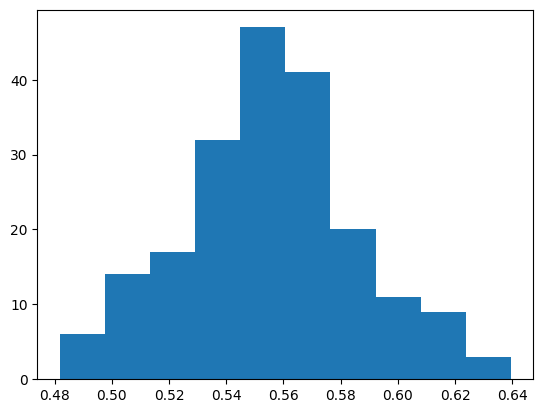

In [102]:
plt.hist(Y_1)
plt.show()

La probabilidad estimada de que una persona espera a la otra como maximo 10 min es

In [110]:
y_m = np.mean(Y_1)
print(y_m)

0.5554595854887467


con una desviacion estandar de 

In [111]:
s_m = np.std(Y_1)
print(s_m)

0.030370713210337612


con ese modelo, podemos estimar el numero de veces para repetir dicho modelo con la ecuacion 

\begin{equation}
  N = \left( \frac{2 \sigma z_{\frac{\alpha}{2} }}{\epsilon} \right)^2
\end{equation}

In [142]:
N = round(mt.pow((2*s_m*1.96)/(0.01),2))
print(N)

142


entonces con 142 iteraciones obtenemos

In [145]:
Y_2 = modelo (N)
y2_m = np.mean(Y_2)
s_y2 = np.std(Y_2)
print('y_m2 =',y2_m)
print('s_y2 =',s_y2)

y_m2 = 0.5572435924402199
s_y2 = 0.032287803935003


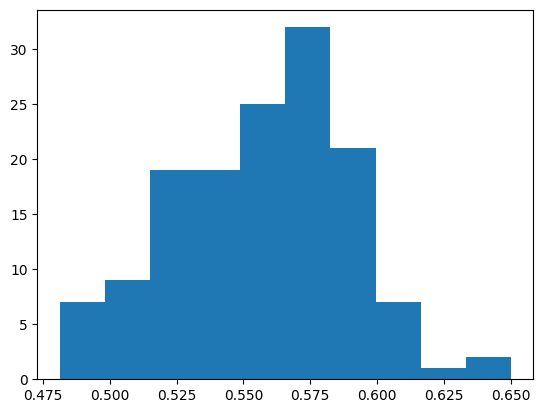

In [146]:
plt.hist(Y_2)
plt.show()



**Paso 7**. Hallar el intervalo de confianza para la media 
\begin{equation*}
  \bar{x} - Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x} + Z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}} 
\end{equation*}

El intervalo de confianza para la media de que una persona espera a la otra como maximo 10 min es

In [147]:
print(y2_m - 1.96*(s_y2/np.sqrt(N)), y2_m + 1.96*s_y2/np.sqrt(N))

0.5519329091003516 0.5625542757800882


entonces, la probabilidad estimada esta dentro del intervalo con una confiabilidad del 95\%

Por tanto, si dos personas quedan citas, la probabilidad de que una persona espera 10 min a la otra, es de

In [149]:
print('p =',y2_m)

p = 0.5572435924402199


### Solucion analitica


Sean $X_1$ y $X_2$ variables aletarias continuas con  distribucion uniforme \begin{align*}
  X_1 &\sim U(0,30)\\
  X_2 &\sim U(0,30)\\\\
\end{align*}

entonces, sus funciones de densidad son

\begin{align}
        X_1 = \left\{
        \begin{array}{cl}
        \frac{1}{30} & 0 \leq x \leq 30 \\
        0 & \text{en  otro  caso}
        \end{array}
        \right.\\\\
\end{align}

\begin{align}
        X_2 = \left\{
        \begin{array}{cl}
        \frac{1}{30} & 0 \leq x \leq 30 \\
        0 & \text{en  otro  caso}
        \end{array}
        \right.\\\\
\end{align}

Dado que son variables independientes, su función de densidad conjunta es

\begin{align}
        f(x_1,x_2) = f(x_1)f(x_2) = \left\{
        \begin{array}{cl}
        \frac{1}{30^2} & 0 \leq x_1 \leq 30 \text{ , } 0\leq x_2 \leq 30 \\ 
        0 & \text{en  otro  caso}
        \end{array}
        \right.\\\\
\end{align}

Tenemos que la expresion para que cualquier persona espere a la otra como maximo 10 min es

\begin{equation*}
  |X_1-X_2|\leq10
\end{equation*}


In [ ]:
x=sst.poisson(2.5)


rd.

